In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load train logs

In [2]:
train_logs = pd.read_csv('../input/linking-writing-processes-to-writing-quality/train_logs.csv')
train_logs.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


# Data shape

In [3]:
train_logs.shape

(8405898, 11)

# Data types

In [4]:
train_logs.dtypes

id                 object
event_id            int64
down_time           int64
up_time             int64
action_time         int64
activity           object
down_event         object
up_event           object
text_change        object
cursor_position     int64
word_count          int64
dtype: object

# NaN values

In [5]:
train_logs.isna().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

# Total number of logs

In [6]:
train_logs['id'].nunique()

2471

# Events size distribution

<Axes: xlabel='None'>

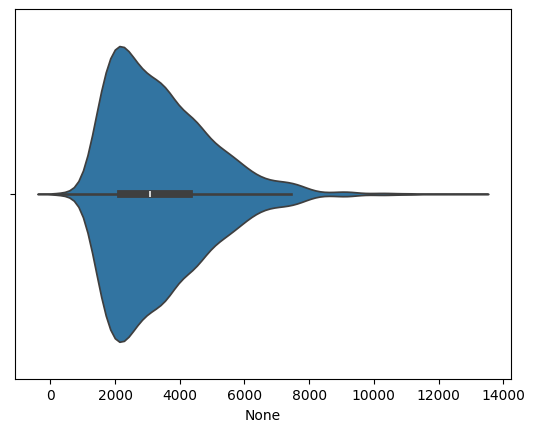

In [7]:
logID2size = train_logs.groupby('id').size()
sns.violinplot(x=logID2size)

# min/mean/median/max event size

In [8]:
logID2size.min(), logID2size.mean(), logID2size.median(), logID2size.max()

(262, 3401.8203156616755, 3082.0, 12876)

# **action_time** global distribution

<Axes: xlabel='action_time'>

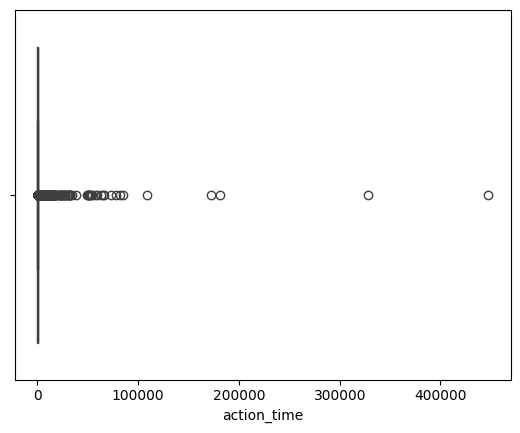

In [9]:
sns.boxplot(data=train_logs, x='action_time')

# **action_time** mean/median distribution (grouped by log)

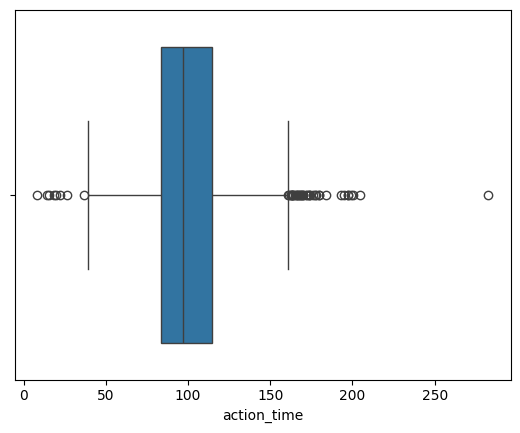

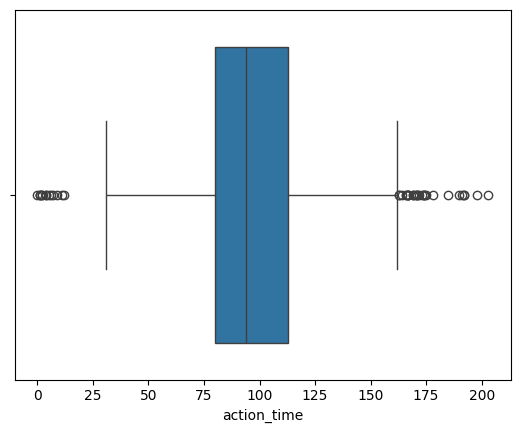

In [10]:
sns.boxplot(data=train_logs[['id', 'action_time']].groupby('id').mean(), x='action_time')
plt.show()
sns.boxplot(data=train_logs[['id', 'action_time']].groupby('id').median(), x='action_time')
plt.show()

# **activity** global distribution

<Axes: xlabel='activity_clean', ylabel='count'>

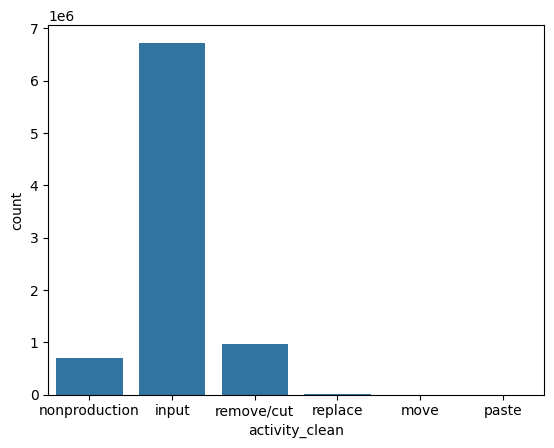

In [11]:
train_logs['activity_clean'] = train_logs['activity'].apply(lambda x: x.lower() if 'Move From' not in x else 'move')
sns.countplot(data=train_logs, x='activity_clean')

# **down_event** global frequencies

In [12]:
train_logs['down_event'].value_counts(normalize=True).sort_values(ascending=False)

down_event
q             6.382803e-01
Space         1.436049e-01
Backspace     1.146920e-01
Shift         3.976101e-02
ArrowRight    1.443486e-02
                  ...     
¡             1.189641e-07
Å            1.189641e-07
Â´            1.189641e-07
Pause         1.189641e-07
F6            1.189641e-07
Name: proportion, Length: 131, dtype: float64

# **up_event** global frequencies

In [13]:
train_logs['up_event'].value_counts(normalize=True).sort_values(ascending=False)

up_event
q             6.382172e-01
Space         1.436049e-01
Backspace     1.146920e-01
Shift         3.976101e-02
ArrowRight    1.443486e-02
                  ...     
F1            1.189641e-07
k             1.189641e-07
Pause         1.189641e-07
Â´            1.189641e-07
F6            1.189641e-07
Name: proportion, Length: 130, dtype: float64

# Fraction of events where **up_event** != **down_event**

In [14]:
sum(train_logs['down_event'] != train_logs['up_event']) / len(train_logs)

6.352682366595455e-05

# **text_change** global frequencies (alphanum/other)

In [15]:
train_logs['text_change'].apply(lambda x: 'alphanum' if x == 'q' else 'other').value_counts(normalize=True)

text_change
alphanum    0.729037
other       0.270963
Name: proportion, dtype: float64

# **word_count** distribution (by last event)

<Axes: xlabel='word_count'>

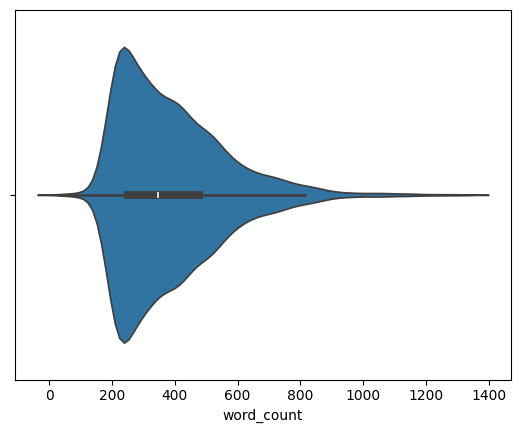

In [16]:
sns.violinplot(data=train_logs.groupby('id').tail(1), x='word_count')

# **word_count** distribution (aggregate by max)

<Axes: xlabel='word_count'>

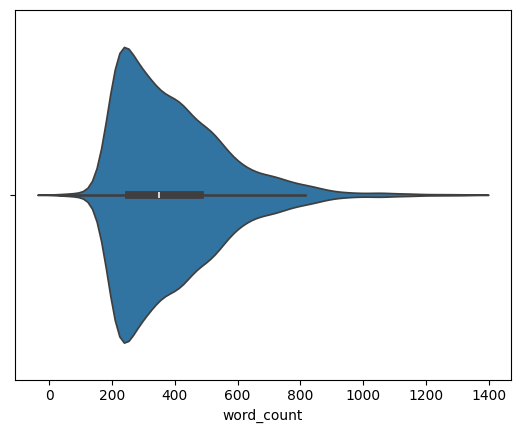

In [17]:
sns.violinplot(data=train_logs[['id', 'word_count']].groupby('id').max(), x='word_count')

# **cursor_position** global distribution

<Axes: xlabel='cursor_position'>

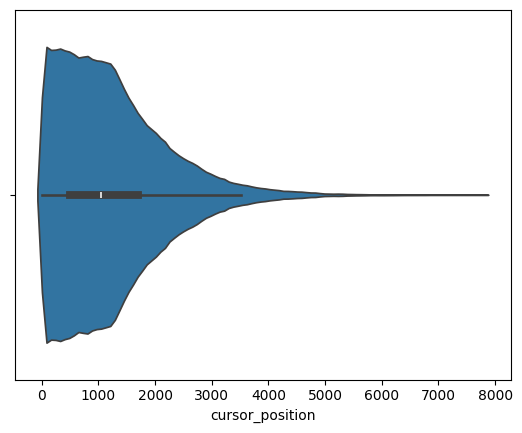

In [18]:
sns.violinplot(data=train_logs, x='cursor_position')

# **Labels**

In [19]:
train_labels = pd.read_csv('../input/linking-writing-processes-to-writing-quality/train_scores.csv')
print(train_labels.shape)
train_labels.head()

(2471, 2)


,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


<Axes: xlabel='score', ylabel='count'>

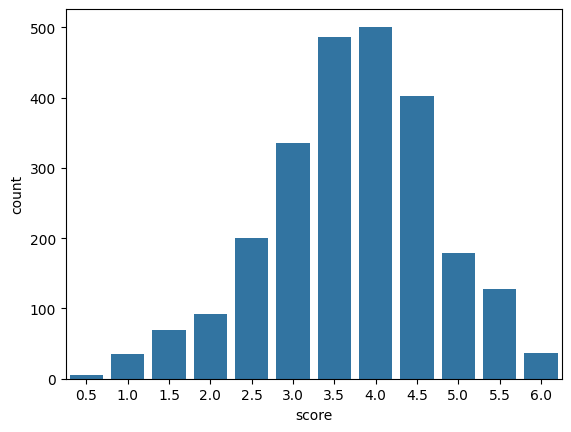

In [20]:
sns.countplot(data=train_labels, x='score')